# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context** 
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents. 

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance. 

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

# New Section

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## **Importing the necessary libraries**

In [2]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, LeakyReLU

from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical

**Let us check the version of tensorflow.**

In [3]:
tf.__version__

'2.12.0'

## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [4]:
# As we are using a .h5 file, the following code is required to load the dataset.
import h5py

h5f = h5py.File('/content/drive/MyDrive/MIT_ADSP_ELECTIVE_PROJECT/SVHN_single_grey1.h5', 'r')

# Load the training and the test dataset

X_train = h5f['X_train'][:]

y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]

y_test = h5f['y_test'][:]

h5f.close()

Check the number of images in the training and the testing dataset.

In [5]:
X_train.shape, X_test.shape

((42000, 32, 32), (18000, 32, 32))

**Observation:**


1. X_train has 42,000 images which have dimensions of 32 x 32.
2. X_test has 18,000 images which have dimensions of 32 x 32.
3. In total there are 60,000 images that can be used as data.



## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

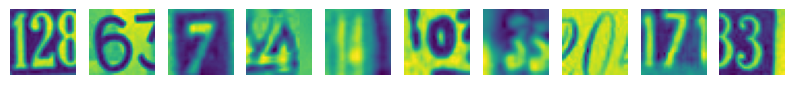

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [6]:
# Code below is used to show 10 images and provide the label of these 10 images.
plt.figure(figsize = (10,1))

for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(X_train[i])
  plt.axis('off')

plt.show()

print('label for each of the above image: %s' % (y_train[0:10]))

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [7]:
print("Shape of the First Image: ", X_train[0].shape)

Shape of the First Image:  (32, 32)


In [8]:
print("Array of the Array of the First Image", X_train[0])

Array of the Array of the First Image [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Observation:


1. We can see that the shape of the images will be 32 x 32, the next step would be to flatten the 2D array into 1D array to help with Normalizing the data. 1D array will have 1 Column of 32*32 = 1024 rows.



In [9]:
# Below code is used to reshape the 2D arrays for the Train and Test Data into a 1D Array of 1024 rows.
X_train = X_train.reshape(X_train.shape[0], 1024)

X_test = X_test.reshape(X_test.shape[0], 1024)

In [10]:
X_train.shape, X_test.shape

((42000, 1024), (18000, 1024))

1. We can see now that both of X_train and X_test now have 1024 rows for each of the images

### **Normalize the train and the test data**

In [11]:
# Checking the 1D array before normalizing.
X_train[0], X_test[0]

(array([33.0704, 30.2601, 26.852 , ..., 49.6682, 50.853 , 53.0377],
       dtype=float32),
 array([ 40.558 ,  46.7917,  48.9764, ..., 110.0169, 111.2017, 114.1906],
       dtype=float32))

In [12]:
# As we are dealing with images with values ranging from 0 - 255, we will be dividing by 255 to normalize the arrays.
X_train_normalized = X_train/255

X_test_normalized = X_test/255 

In [13]:
# Viewing the 1D array of the first item in both Test and Train data set after normalization.
X_train_normalized[0], X_test_normalized[0]

(array([0.12968785, 0.11866706, 0.10530196, ..., 0.19477727, 0.19942354,
        0.20799099], dtype=float32),
 array([0.15905097, 0.18349686, 0.19206432, ..., 0.43143883, 0.4360851 ,
        0.44780627], dtype=float32))

Print the shapes of Training and Test data

In [14]:
print("Training Set:", X_train_normalized.shape, y_train.shape)
print("Test Set:", X_test_normalized.shape, y_test.shape)

Training Set: (42000, 1024) (42000,)
Test Set: (18000, 1024) (18000,)


### **One-hot encode output**

In [15]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)

y_test_encoded = tf.keras.utils.to_categorical(y_test)

y_train_encoded, y_test_encoded

(array([[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 1., ..., 0., 0., 0.]], dtype=float32))

**Observation:**
1. Managed to convert all of our 2D arrays into a 1D array.
2. One hot encoded hour test data.
3. Next steps will be to apply the ANN model to see how accurately we will be able to train our data.

## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [16]:
# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable. 
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [17]:
def nn_model_1():

    model = Sequential() 
# First hidden layer with 64 Nodes and Relu activation on our input shape which is 1024 (Our 1D array shape)
    model.add(Dense(64, input_shape = (1024, ), activation = 'relu'))
# Second Hidden Layer with 32 Nodes and Relu activation
    model.add(Dense(32, activation = 'relu' ))
# Output layer with 10 Nodes and Softmax activation
    model.add(Dense(10, activation = 'softmax'))

    model.compile(loss = 'categorical_crossentropy',
              metrics = ['accuracy'],
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001))
    
    return model

In [18]:
model_1 = nn_model_1()

In [19]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Setting the number of epochs for training
num_epochs = 20

# Setting the batch size for training
batch_size = 128

# Fitting the model
history_1 = model_1.fit(X_train_normalized, y_train_encoded, validation_split = 0.2, epochs = num_epochs, batch_size = batch_size, verbose = 1)

Epoch 1/20
263/263 [==============================] - 5s 6ms/step - loss: 2.2966 - accuracy: 0.1149 - val_loss: 2.2563 - val_accuracy: 0.1470
Epoch 2/20
263/263 [==============================] - 1s 5ms/step - loss: 2.1132 - accuracy: 0.2275 - val_loss: 1.9753 - val_accuracy: 0.3154
Epoch 3/20
263/263 [==============================] - 2s 7ms/step - loss: 1.9138 - accuracy: 0.3293 - val_loss: 1.8557 - val_accuracy: 0.3582
Epoch 4/20
263/263 [==============================] - 2s 9ms/step - loss: 1.8125 - accuracy: 0.3811 - val_loss: 1.7706 - val_accuracy: 0.4001
Epoch 5/20
263/263 [==============================] - 2s 9ms/step - loss: 1.7037 - accuracy: 0.4256 - val_loss: 1.6556 - val_accuracy: 0.4427
Epoch 6/20
263/263 [==============================] - 3s 13ms/step - loss: 1.5946 - accuracy: 0.4629 - val_loss: 1.5464 - val_accuracy: 0.4857
Epoch 7/20
263/263 [==============================] - 3s 12ms/step - loss: 1.5175 - accuracy: 0.4941 - val_loss: 1.5090 - val_accuracy: 0.4979
Epoc

### **Plot the Training and Validation Accuracies and write down your Observations.**

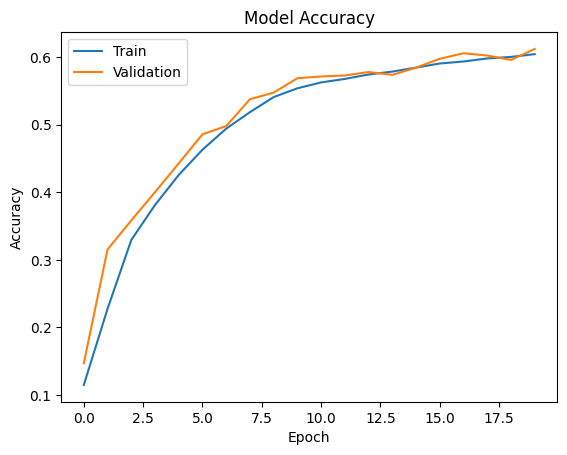

In [21]:
plt.plot(history_1.history['accuracy'])

plt.plot(history_1.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

**Observations:_______**


1. From this we can see that the Training accuracy is at 63 percent and the validation accuracy is also around 63 percent. We can say that overfitting is not occurring and the training accuracy and validation accuracy are following a similar curve. 
2. The validation curve is very smoothly following each other.
3. After around 10 epochs, we can say that the accuracy for both are reaching a constant point around 60 percent. 
4. Although the training and validation accuracies are both following a similar curve, the accuracy can be improved, and will be done so through the second ANN Model.

Let's build one more model with higher complexity and see if we can improve the performance of the model. 

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [22]:
# Clearing the backend
from tensorflow.keras import backend

backend.clear_session()

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [23]:
def nn_model_2():

    model = Sequential() 
# First Hidden Layer with 256 nodes and Relu activation with 1024 as the input shape.
    model.add(Dense(256, input_shape = (1024, ), activation = 'relu'))
# Second Hidden Layer with 128 nodes and Relu activation
    model.add(Dense(128, activation = 'relu' ))
# Dropout Layer where we are dropping 20 percent of the Nodes.
    model.add(Dropout(0.2))
# Third Hidden Layer with 64 Nodes and Relu Activation.
    model.add(Dense(64, activation = "relu"))
# Fourth hidden layer with 64 Nodes and Relu Activation.
    model.add(Dense(64, activation = "relu"))
# Fifth hidden layer with 32 nodes and Relu Activation
    model.add(Dense(32, activation = "relu"))
# Batch Normalization
    model.add(BatchNormalization())
# Output layer with 10 nodes and softmax activation.
    model.add(Dense(10, activation = 'softmax'))

    model.compile(loss = 'categorical_crossentropy',
              metrics = ['accuracy'],
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0005))
    
    return model

In [24]:
model_2 = nn_model_2()

In [25]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (BatchN  (None, 32)               1

In [26]:
# Setting the number of epochs for training
num_epochs = 30

# Setting the batch size for training
batch_size = 128

# Fitting the model
history_2 = model_2.fit(X_train_normalized, y_train_encoded, validation_split = 0.2, epochs = num_epochs, batch_size = batch_size, verbose = 1)

Epoch 1/30
263/263 [==============================] - 5s 8ms/step - loss: 2.3365 - accuracy: 0.1030 - val_loss: 2.3033 - val_accuracy: 0.1076
Epoch 2/30
263/263 [==============================] - 2s 6ms/step - loss: 2.1376 - accuracy: 0.2099 - val_loss: 2.0516 - val_accuracy: 0.2852
Epoch 3/30
263/263 [==============================] - 2s 7ms/step - loss: 1.6117 - accuracy: 0.4440 - val_loss: 1.4321 - val_accuracy: 0.5160
Epoch 4/30
263/263 [==============================] - 2s 8ms/step - loss: 1.3232 - accuracy: 0.5592 - val_loss: 1.2647 - val_accuracy: 0.5839
Epoch 5/30
263/263 [==============================] - 3s 10ms/step - loss: 1.1969 - accuracy: 0.6085 - val_loss: 1.0990 - val_accuracy: 0.6452
Epoch 6/30
263/263 [==============================] - 2s 8ms/step - loss: 1.1369 - accuracy: 0.6295 - val_loss: 1.1050 - val_accuracy: 0.6442
Epoch 7/30
263/263 [==============================] - 2s 7ms/step - loss: 1.0804 - accuracy: 0.6514 - val_loss: 1.0576 - val_accuracy: 0.6623
Epoch

### **Plot the Training and Validation Accuracies and write down your Observations.**

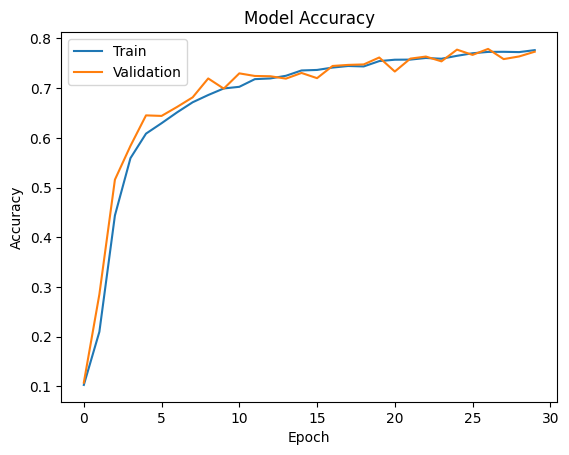

In [27]:
plt.plot(history_2.history['accuracy'])

plt.plot(history_2.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

In [28]:
accuracy = model_2.evaluate(X_test_normalized, y_test_encoded, verbose = 1)

563/563 [==============================] - 2s 3ms/step - loss: 0.7520 - accuracy: 0.7698


**Observations:_______**

1. We can see similar curve to the first model.
2. We can see higher accuracy for both the Training and Validation curves at approximately 75 percent.
3. Around the 15 epochs mark we can see that the curve begins to flatten out.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [29]:
test_pred = model_2.predict(X_test_normalized)

test_pred = np.argmax(test_pred, axis = -1)

563/563 [==============================] - 2s 4ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [30]:
y_true = np.argmax(y_test_encoded, axis = -1)

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

              precision    recall  f1-score   support

           0       0.94      0.69      0.80      1814
           1       0.74      0.83      0.78      1828
           2       0.81      0.79      0.80      1803
           3       0.68      0.78      0.73      1719
           4       0.82      0.83      0.83      1812
           5       0.74      0.75      0.74      1768
           6       0.88      0.67      0.76      1832
           7       0.84      0.79      0.82      1808
           8       0.66      0.78      0.71      1812
           9       0.70      0.79      0.74      1804

    accuracy                           0.77     18000
   macro avg       0.78      0.77      0.77     18000
weighted avg       0.78      0.77      0.77     18000



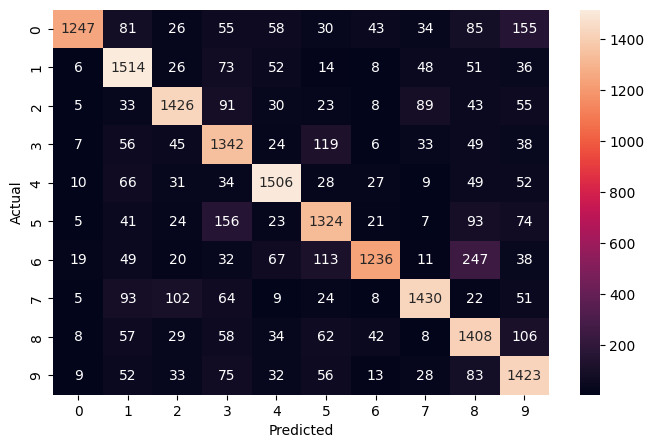

In [31]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_true, test_pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, test_pred)     #Write the code for creating confusion matrix using actual labels (y_test) and predicted labels (test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Final Observations:__________**

1. We can see through the confusion matrix that our model is doing quite well in identifying the numbers.
2. There are certain numbers here that we can see tends to do poorly, such as the number 3 and 5 tend to get mixed and the numbers 8 and 6 with more that 100 incorrectly predicted.
3. we have a recall of 76 percent from our best model which is the second ANN Model.

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [32]:
import h5py

h5f = h5py.File('/content/drive/MyDrive/MIT_ADSP_ELECTIVE_PROJECT/SVHN_single_grey1.h5', 'r')

X_train = h5f['X_train'][:]

y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]

y_test = h5f['y_test'][:]


# Close this file

h5f.close()

Check the number of images in the training and the testing dataset.

In [33]:
X_train.shape[0], X_test.shape[0]

(42000, 18000)

**Observation:**


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [34]:
print("Shape of the First Image: ", X_train[0].shape)

print("Array of the Array of the First Image:\n", X_train[0])

Shape of the First Image:  (32, 32)
Array of the Array of the First Image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [35]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)

X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

Normalize inputs from 0-255 to 0-1

In [36]:
X_train_normalized = X_train/255.0

X_test_normalized = X_test/255.0

Print New shape of Training and Test

In [37]:
print('New Shape of Training Set: \n', X_train.shape, y_train.shape)

print('New Shape of Test Set:\n', X_test.shape, y_test.shape)

New Shape of Training Set: 
 (42000, 32, 32, 1) (42000,)
New Shape of Test Set:
 (18000, 32, 32, 1) (18000,)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [38]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)

y_test_encoded = tf.keras.utils.to_categorical(y_test)

y_train_encoded, y_test_encoded

(array([[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 1., ..., 0., 0., 0.]], dtype=float32))

**Observation:**


## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [39]:
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [40]:
import keras
from tensorflow.keras.layers import Conv2D
def cnn_model_1():

    model = Sequential() 
# First Convolutional layer with 16 nodes and kernel size of 3 x 3 with same padding
    model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (32, 32, 1)))
# Applying LeakyRelu
    model.add(LeakyReLU(0.1))
# Second Convolutional layer with 32 nodes and kernel size of 3x3 with same padding
    model.add(Conv2D(filters= 32, kernel_size = (3, 3), padding = 'same'))
# Applying Leaky Relu
    model.add(LeakyReLU(0.1))
# Applying MaxPooling with pool size of 2 x 2
    model.add(MaxPooling2D(pool_size= (2, 2)))
# Flattening the output from the previous layer
    model.add(Flatten())
# Applying a dense layer of 32 nodes
    model.add(Dense(32))
# Applying Leaky Relu with 0.1 slope
    model.add(LeakyReLU(0.1))
# Output layer of 10 nodes with softmax activation
    model.add(Dense(10, activation = "softmax"))
    
    model.compile(loss = 'categorical_crossentropy',
    
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    
    metrics=['accuracy'])
    
    return model

In [41]:
model_3 = cnn_model_1()

In [42]:
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                      

In [43]:
# Setting the number of epochs for training
num_epochs = 20

# Setting the batch size for training
batch_size = 32

# Fitting the model
history_3 = model_3.fit(X_train_normalized, y_train_encoded, validation_split = 0.2, epochs = num_epochs, batch_size = batch_size, verbose = 1)

Epoch 1/20
1050/1050 [==============================] - 14s 6ms/step - loss: 1.1339 - accuracy: 0.6310 - val_loss: 0.6440 - val_accuracy: 0.8125
Epoch 2/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.5461 - accuracy: 0.8454 - val_loss: 0.5213 - val_accuracy: 0.8517
Epoch 3/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.4503 - accuracy: 0.8660 - val_loss: 0.5156 - val_accuracy: 0.8525
Epoch 4/20
1050/1050 [==============================] - 7s 7ms/step - loss: 0.3885 - accuracy: 0.8857 - val_loss: 0.4482 - val_accuracy: 0.8750
Epoch 5/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.3409 - accuracy: 0.8975 - val_loss: 0.4568 - val_accuracy: 0.8726
Epoch 6/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.3038 - accuracy: 0.9087 - val_loss: 0.4528 - val_accuracy: 0.8746
Epoch 7/20
1050/1050 [==============================] - 7s 7ms/step - loss: 0.2744 - accuracy: 0.9165 - val_loss: 0.4497 - val_accuracy

### **Plot the Training and Validation Accuracies and Write your observations.**

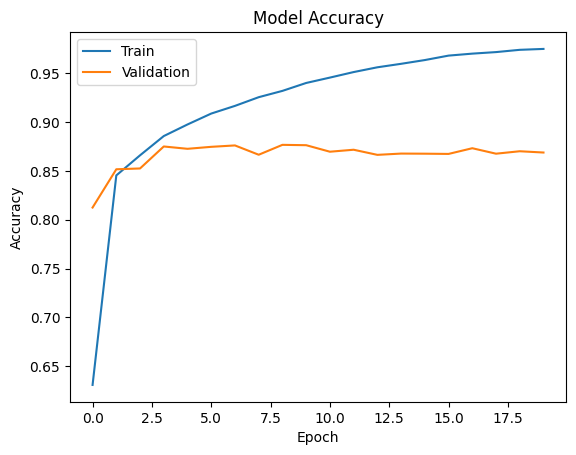

In [44]:
plt.plot(history_3.history['accuracy'])

plt.plot(history_3.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

**Observations:__________**

1. Train and Validation both have high accuracy but we can see that training is a lot higher than the Validation Accuracy. This could be suggesting that there is overfitting happening within our model.
2. The validation accuracy begins to flatten after 2.5 epochs at around 87 percent.

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [45]:
backend.clear_session()

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding** 
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [46]:
def cnn_model_2():

    model = Sequential() 

    model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (32, 32, 1)))

    model.add(LeakyReLU(0.1))

    model.add(Conv2D(filters= 32, kernel_size = (3, 3), padding = 'same'))

    model.add(LeakyReLU(0.1))

    model.add(MaxPooling2D(pool_size= (2, 2)))

    model.add(BatchNormalization())

    model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same'))

    model.add(LeakyReLU(0.1))

    model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "same"))

    model.add(LeakyReLU(0.1))

    model.add(MaxPooling2D(pool_size = (2,2)))

    model.add(BatchNormalization())
    
    model.add(Flatten())

    model.add(Dense(32))

    model.add(LeakyReLU(0.1))

    model.add(Dropout(0.5))

    model.add(Dense(10, activation = "softmax"))
    
    model.compile(loss = 'categorical_crossentropy',
    
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    
    metrics=['accuracy'])
    
    return model

In [47]:
model_4 = cnn_model_2()

In [48]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                          

In [49]:
# Setting the number of epochs for training
num_epochs = 30

# Setting the batch size for training
batch_size = 128

# Fitting the model
history_4 = model_4.fit(X_train_normalized, y_train_encoded, validation_split = 0.2, epochs = num_epochs, batch_size = batch_size, verbose = 1)

Epoch 1/30
263/263 [==============================] - 7s 14ms/step - loss: 1.3145 - accuracy: 0.5608 - val_loss: 2.3547 - val_accuracy: 0.1498
Epoch 2/30
263/263 [==============================] - 3s 13ms/step - loss: 0.6489 - accuracy: 0.7998 - val_loss: 0.7337 - val_accuracy: 0.7599
Epoch 3/30
263/263 [==============================] - 3s 12ms/step - loss: 0.5375 - accuracy: 0.8360 - val_loss: 0.4024 - val_accuracy: 0.8855
Epoch 4/30
263/263 [==============================] - 3s 10ms/step - loss: 0.4706 - accuracy: 0.8580 - val_loss: 0.4002 - val_accuracy: 0.8826
Epoch 5/30
263/263 [==============================] - 3s 11ms/step - loss: 0.4235 - accuracy: 0.8699 - val_loss: 0.4021 - val_accuracy: 0.8812
Epoch 6/30
263/263 [==============================] - 3s 11ms/step - loss: 0.3958 - accuracy: 0.8799 - val_loss: 0.3927 - val_accuracy: 0.8877
Epoch 7/30
263/263 [==============================] - 4s 14ms/step - loss: 0.3718 - accuracy: 0.8858 - val_loss: 0.3913 - val_accuracy: 0.8858

### **Plot the Training and Validation accuracies and write your observations.**

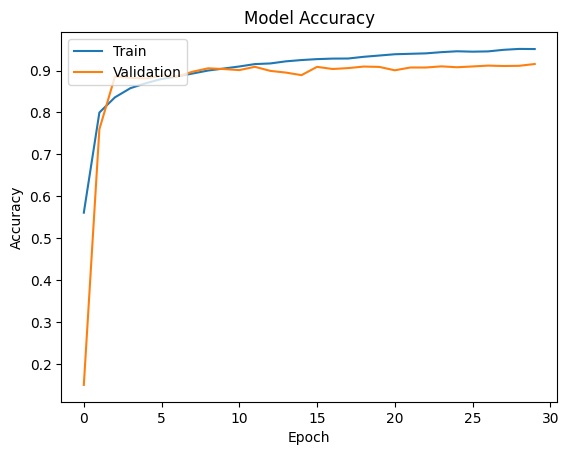

In [50]:
plt.plot(history_4.history['accuracy'])

plt.plot(history_4.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

**Observations:________**
1. We can say that we have overcome overfitting to a certain extent with the second CNN model.
2. Around 5 epochs both the training and validation accuracy tends to flatten around the 90 percent mark.
3. This seems to be a good Model to use, but there could still be some overfitting that is happening and this can be found out by applying our model on the y_test data.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.** 

In [51]:
test_pred = model_4.predict(X_test_normalized)

test_pred = np.argmax(test_pred, axis = -1)

563/563 [==============================] - 2s 3ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [52]:
y_true = np.argmax(y_test_encoded, axis = -1)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1814
           1       0.91      0.90      0.91      1828
           2       0.92      0.92      0.92      1803
           3       0.86      0.90      0.88      1719
           4       0.94      0.92      0.93      1812
           5       0.90      0.90      0.90      1768
           6       0.95      0.87      0.91      1832
           7       0.91      0.94      0.93      1808
           8       0.89      0.91      0.90      1812
           9       0.89      0.91      0.90      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



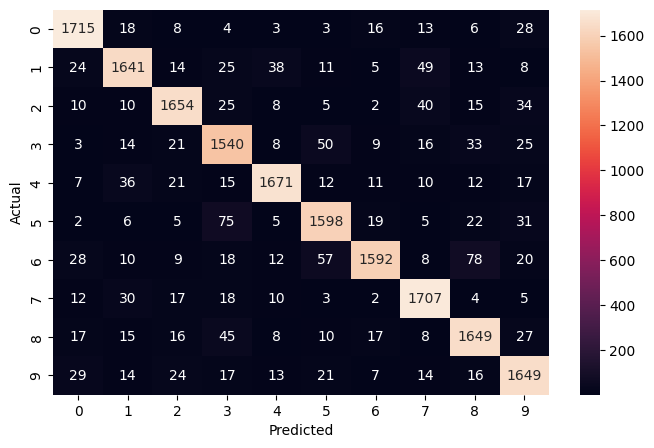

In [53]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_true, test_pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, test_pred)     #Write the code for creating confusion matrix using actual labels (y_test) and predicted labels (test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

### **Write your final observations on the performance of the model on the test data.**

**Final Observations:_________**
1. We can see from the confusion matrix that the new Model is doing a lot better than our second ANN Model.
2. We have a total recall of about 91 percent on our test data with having a small enough range that we can say that it is a good model. There are still areas where we can see that the model gets confused about such as predicted 3s have 75 times when it is actually a 5.